In [1]:
import gpflow
import GPy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# generate data

In [2]:
K = np.zeros((500,500))
K[250:,250:] = np.identity(250)
# kernel 정의
N = 100

k_rbf = GPy.kern.Matern32(1) 
#k_rbf2 =  GPy.kern.RBF(input_dim = 1, variance = 10. , lengthscale= 0.1) 
k_rbf2 = GPy.kern.Exponential(1) 

X = np.linspace(0.,1.,N) # [0,1] 사이에 균일한 거리를 둔 500 개의 point 정의
X = X.reshape((-1,1)) # reshape X to make it n*1

mu = np.zeros((N)) # vector of the means
# RBF Kernel
C1 = k_rbf.K(X,X) + np.diag([0.01]*N,0) # covariance matrix
C2 = k_rbf2.K(X,X)
C = np.zeros((N,N))
C[:int(N/2),:int(N/2)] = C1[:int(N/2),:int(N/2)]
C[int(N/2):,int(N/2):] = C2[int(N/2):,int(N/2):]
# K = np.zeros((N,N))
# K[N/2:,N/2:] = np.identity(N/2)
# C = C + K

# Generate 20 sample path with mean mu and covariance C
Y = np.random.multivariate_normal(mu,C,1)
Y = Z.reshape((-1, 1))

NameError: name 'Z' is not defined

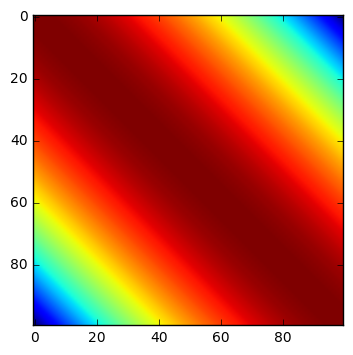

In [6]:
plt.imshow(k.compute_K(X, X))

0.0
0.8035717010498047


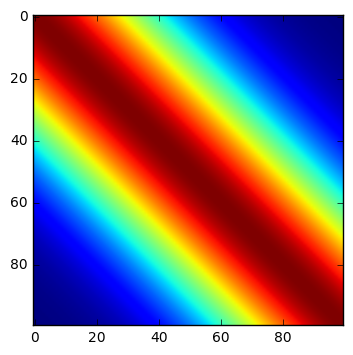

In [3]:
import time
st = time.time()
k = gpflow.kernels.RBF(1, lengthscales=0.3)
m = gpflow.gpr.GPR(X, Y, kern=k)
# m = gpflow.models.SGPR(X, Y, kern=k, Z=X.copy())
m.likelihood.variance = 0.01
print(time.time() - st)
plt.imshow(m.kern.compute_K(X,X))
m.optimize(disp=1)
# m.optimize()
print(time.time() - st)

In [37]:
X[0:0+1]

array([[ 0.]])

In [69]:
lr_list = []
for i in range(N):
    X1 = X[:i+1]
    Y1 = Y[:i+1]
    X2 = X[i+1:]
    Y2 = Y[i+1:]
    
    # 1
    m.X = X1
    m.Y = Y1
    m.optimize(disp=1)
    
    cov1 = m.kern.compute_K(X,X)
    
    # 2
    m.X = X1
    m.Y = Y1
    m.optimize(disp=1)
    
    cov2 = m.kern.compute_K(X,X)
    
    # ht
    altcov = np.zeros((N, N))
    altcov[:i+1,:i+1] = cov1[:i+1,:i+1]
    altcov[i+1:,i+1:] = cov2[i+1:,i+1:]
    invcov = np.linalg.inv(cov1)
    invaltcov = np.linalg.inv(altcov)
    
    lr = np.dot(np.matmul(np.transpose(X),invcov-invaltcov),X) + np.log(np.linalg.det(cov1)/np.linalg.det(altcov))
    lr_list.append(lr)

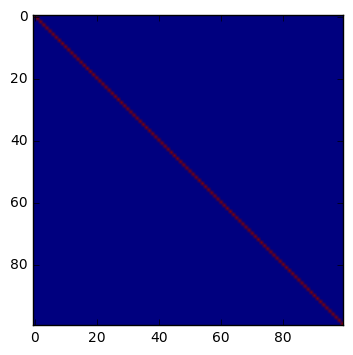

In [70]:
plt.imshow(cov1)

In [66]:
altcov

array([[  1.00000086e-06,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000086e-06,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000086e-06, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000086e-06,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000086e-06,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000086e-06]])

In [63]:
np.log(np.linalg.det(cov1)/np.linalg.det(altcov))

array([[ 0.]])

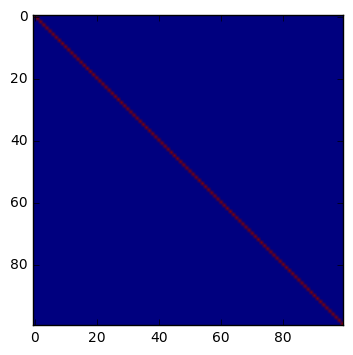

In [61]:
plt.imshow(invcov)

In [55]:
lr_list

[array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ nan]]),
 array([[ 

ValueError: x and y can be no greater than 2-D

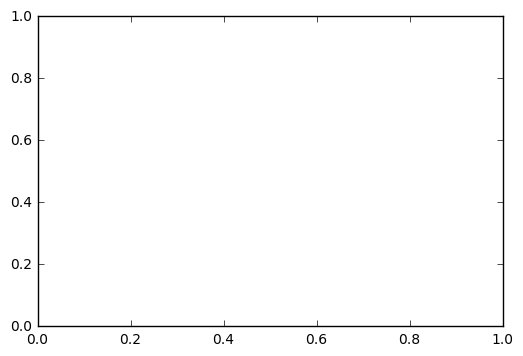

In [54]:
plt.plot(lr_list)

In [46]:
print(m.likelihood)

likelihood.variance transform:+ve prior:None
[ 0.51465723]


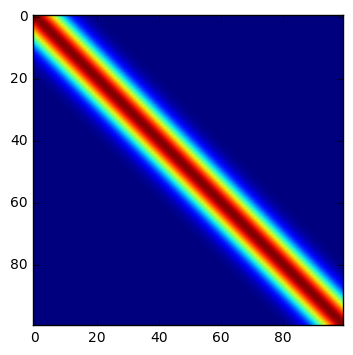

In [35]:
plt.imshow(m.kern.compute_K(X,X))